Projeto de Transer Learning usando YOLO

Esse codigo foi feito para a Classificação de imagens , as duas classes escolhidas para o Transfer Learning são Bottle e Helmet que foram datasets pegos do roboflow


In [ ]:
!pip install roboflow
 # pega os dois datasets e faz o download
from roboflow import Roboflow
rf = Roboflow(api_key="tb3w0whe8UkYCBLcl6nN")
project = rf.workspace("new-workspace-du6gw").project("bottle-l6yux")
version = project.version(1)
dataset = version.download("yolov8")

rf = Roboflow(api_key="tb3w0whe8UkYCBLcl6nN")
project = rf.workspace("ad-tm5st").project("yolo-helmet-l7jeb")
version = project.version(1)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bottle-1 in yolov8:: 100%|██████████| 960/960 [00:00<00:00, 7579.03it/s]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo-helmet-1 in yolov8:: 100%|██████████| 3210/3210 [00:00<00:00, 6920.18it/s]


In [ ]:
import os,shutil

base_dir = "./dataset"
for folders in ["train","val","test"]: #criando estrutura do dataset que vai unificar as duas os dois outros datasets
  os.makedirs(base_dir+ f"/images/{folders}",exist_ok=True)
  os.makedirs(base_dir+ f"/labels/{folders}",exist_ok=True)


def unificar_datasets(src,dst,class_id):

  for split in ["train","valid","test"]:
    split_dst = "val" if split == "valid" else split

    img_path = os.path.join(src, split, "images")
    lbl_path = os.path.join(src, split, "labels")

    if not os.path.exists(img_path):
        continue

    for file in os.listdir(img_path):
      if file.endswith((".jpg",".jpeg",".png")):
        shutil.copy(os.path.join(img_path,file) , os.path.join(dst,"images",split_dst)) #copia a imagem para o destino

        label_file = file.rsplit(".", 1)[0] + ".txt" #cria um aqquivo de texto para as labels
        src_label = os.path.join(lbl_path, label_file)
        dst_label = os.path.join(dst, "labels", split_dst, label_file)

        if os.path.exists(src_label):
          with open(src_label,"r") as f : #lê as linhas dos labels para copia las
            lines = f.readlines()
          new_lines = []
          for line in lines :
            parts = line.strip().split()
            parts[0] = str(class_id)
            new_lines.append(" ".join(parts) + "\n")
            with open(dst_label, "w") as f:
                  f.writelines(new_lines)



unificar_datasets("./Bottle-1", base_dir, 0)
unificar_datasets("./Helmet-1", base_dir, 1)

In [ ]:
import yaml
#proximo passo é criar o yaml que o Yolo utiliza
data = {
    "train" : "./images/train",
    "val" : "./images/val",
    "test" : "./images/test",
    "nc" : 2,
    "names" : ["bottle","helmet"]

}

with open("./dataset/data.yaml", "w") as f:
    yaml.dump(data, f, default_flow_style=False)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt") # modelo usado YOLOv8
#treino por 50 epocas, pega os dados do dataset unificado
model.train(
    data = "./dataset/data.yaml",
    epochs = 50,
    imgsz = 640,
    batch = 16
)

results = model.predict(source = "./dataset/images/test", save = True,conf = 0.5)

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

In [ ]:
model.val() #metricas do modelo

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 460.7±310.4 MB/s, size: 14.6 KB)
val: Scanning /content/dataset/labels/val.cache... 19 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 19/19 30.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.4it/s 5.4s
                   all         19         19      0.929      0.895      0.967      0.729
                bottle         19         19      0.929      0.895      0.967      0.729
Speed: 2.3ms preprocess, 274.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs/detect/train103


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5febfbade0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

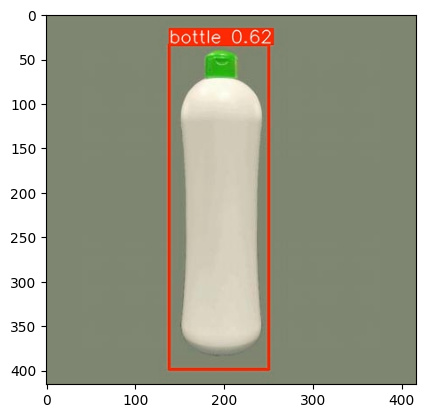

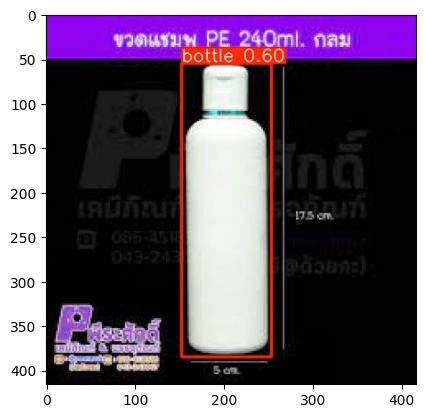

In [ ]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("/content/runs/detect/train102/----------------800-----_png.rf.5bc636c3bb4b5afe61b1b52c6dbe2a9f.jpg")
img2 = cv2.imread("/content/runs/detect/train102/---------_jpeg.rf.768e37c688af07921d1c04f63c76e0b0.jpg")

# duas imagens exemplos das que foram geradas pelo modelo
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()